In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/NLP News Bias Data/data_newsbias_cleaned.parquet')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331552 entries, 0 to 2331551
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   title       object
 1   text        object
 2   source      object
 3   bias_label  object
dtypes: object(4)
memory usage: 71.2+ MB


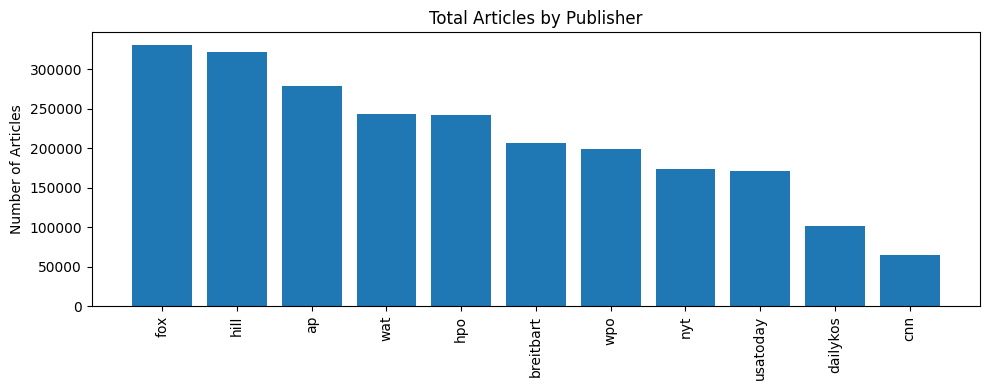

<Figure size 1000x500 with 0 Axes>

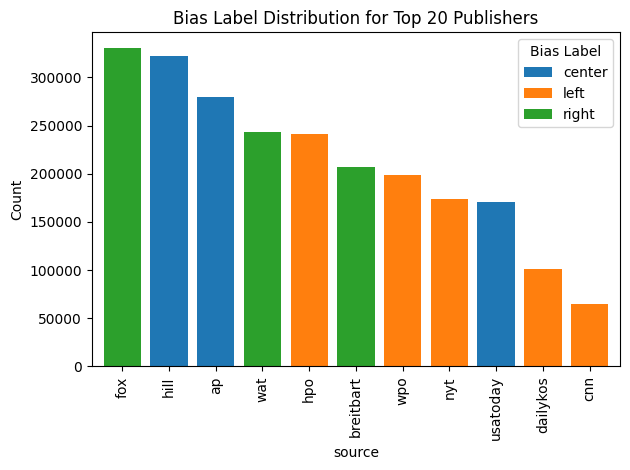

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

counts = (
    df
    .groupby(['source','bias_label'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

total_per_source = counts.sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10,4))
plt.bar(total_per_source.index, total_per_source.values)
plt.xticks(rotation=90)
plt.ylabel('Number of Articles')
plt.title('Total Articles by Publisher')
plt.tight_layout()
plt.show()

top_publishers = total_per_source.head(20).index
pivot = counts.loc[top_publishers]

plt.figure(figsize=(10,5))
pivot.plot(kind='bar', stacked=True, width=0.8)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Bias Label Distribution for Top 20 Publishers')
plt.legend(title='Bias Label')
plt.tight_layout()
plt.show()


In [ ]:
print(df['source'].value_counts())

source
fox          330166
hill         322145
ap           279312
wat          243181
hpo          241417
breitbart    206512
wpo          198529
nyt          173737
usatoday     170737
dailykos     100828
cnn           64988
Name: count, dtype: int64


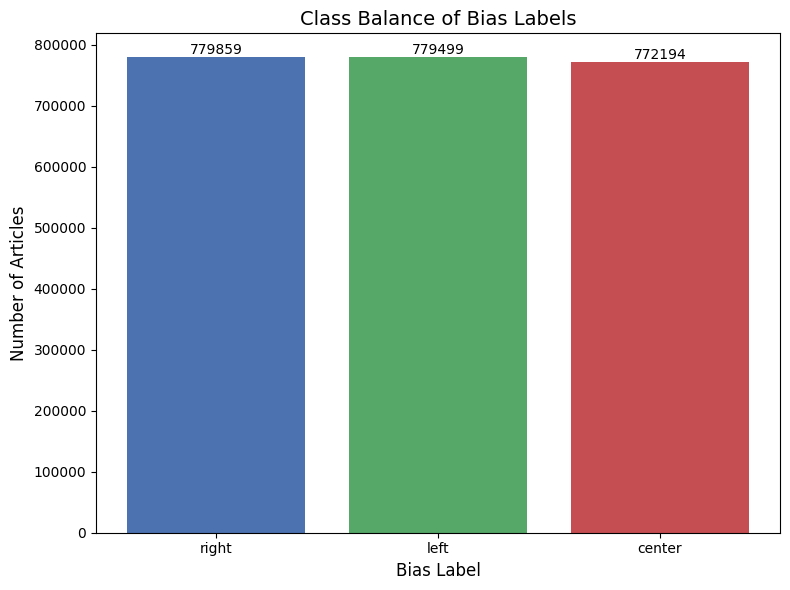

In [ ]:
import matplotlib.pyplot as plt

# 1. Count each label
counts = df['bias_label'].value_counts()

# 2. Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(counts.index, counts.values, color=['#4C72B0','#55A868','#C44E52'])

# 3. Add count labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x‐position: center of bar
        height + 1,                         # y‐position: just above the bar
        f'{int(height)}',                   # label text
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.set_xlabel('Bias Label', fontsize=12)
ax.set_ylabel('Number of Articles', fontsize=12)
ax.set_title('Class Balance of Bias Labels', fontsize=14)
plt.tight_layout()
plt.show()
